In [ ]:
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


# Applying Guassian Blurring to images

In [ ]:
def apply_gaussian_blur(image, kernel_size=(5, 5), sigma=0):
    return cv2.GaussianBlur(image, kernel_size, sigma)

In [ ]:
train_data = np.load('CIFAKE_Train.npz')
test_data = np.load('CIFAKE_Test.npz')

In [ ]:
X_train = train_data['images']
y_train = train_data['labels']

X_test = test_data['images']
y_test = test_data['labels']

label_names = train_data['label_names']

In [ ]:
filtered_train_images = [apply_gaussian_blur(image) for image in X_train]
filtered_test_images = [apply_gaussian_blur(image) for image in X_test]

In [ ]:
# plot images function
def PlotImages(ix_start,num_img,rows,cols,images,labels,label_names,color=True):
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    for i in range(num_img):
        plt.subplot(rows,cols,i+1)
        plt.axis('off')
        if color:
            plt.imshow(images[ix_start+i])
        else:
            plt.imshow(np.squeeze(images[ix_start+i]),cmap='Greys')
        plt.title(label_names[labels[ix_start+i]])

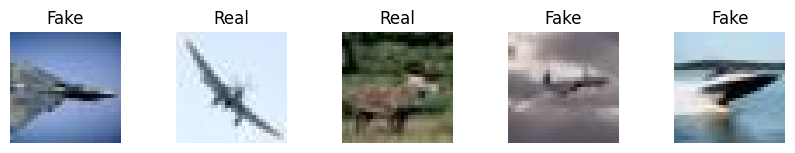

In [ ]:
# images before Gaussian blur
PlotImages(0,5,1,5,X_train,y_train,label_names)

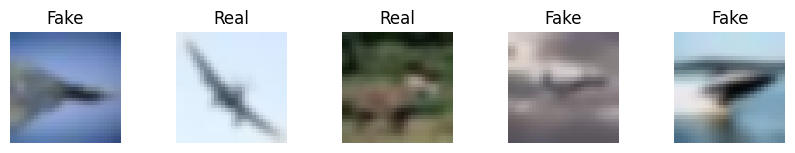

In [ ]:
# images after Gaussian blur
PlotImages(0,5,1,5,filtered_train_images,y_train,label_names)

In [ ]:
# save as .npz file
np.savez_compressed('Gaussian_Blur_Train.npz', images=np.stack(filtered_train_images, axis=0), labels=y_train, label_names=label_names)

In [ ]:
np.savez_compressed('Gaussian_Blur_Test.npz', images=np.stack(filtered_test_images, axis=0), labels=y_test, label_names=label_names)